In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.style.use('seaborn-white')

import proplot
proplot.rc['figure.facecolor'] = 'white'

import multiprocess as mp
import numpy as np
import pandas as pd
import bioframe
import cooltools
import cooler

from cooltools.api.eigdecomp import cis_eig
# Import python package for working with cooler files and tools for analysis
import cooler
import cooltools.lib.plotting
from cooltools.api.insulation import calculate_insulation_score, find_boundaries

import glob

In [3]:
from cooltools import coverage
import cooler.balance as cbal
from multiprocess import Pool
from operator import add
from cooler.tools import split
chunksize = 2000000
nprocesses = 10

In [4]:
# Figure out path to environment's bedgraphtobigwig: 
import sys
env_pkgs_path = [x for x in sys.path if 'site-packages' in x and 'embryonic-chromatin' in x][0]
env_bins_path = '/'.join(env_pkgs_path.split('/')[:env_pkgs_path.split('/').index('lib')]) + '/bin'

In [5]:
resolution = 5_000
PATH = '../data/coolers/danRer11/'
coolpath = f'{PATH}/Wild-Type_11.danrer11-reduced.mapq_30.1000.mcool::/resolutions/{resolution}'
clr = cooler.Cooler(coolpath)

In [6]:
regions = pd.read_csv('../data/genomes/danRer11/danRer11.armsizes.txt')
regions.loc[:, 'name'] = regions.apply(lambda x: f"{x.chrom}:{x.start}-{x.end}", axis=1)

In [7]:
bins = clr.bins()[:]
metadata = bioframe.frac_gene_coverage(bins, 'danRer11')

In [8]:
clr_files = glob.glob( f'{PATH}/*danrer11-reduced.mapq_30.1000.mcool' )
clr_prefs = list(map(lambda x: x.split('.danrer11-reduced')[0].split('/')[-1], clr_files))

### Calculate insulation

In [9]:
windows = [25_000, 50_000, 100_000, 500_000] # Reasonable window sizes for 5 Kb

In [10]:
!mkdir -p ../data/insulation/

mkdir: cannot create directory ‘=p’: File exists
mkdir: cannot create directory ‘../data/insulation/’: File exists


In [10]:
dct_insulation = {}

In [ ]:
# Calculate TADs for a given resolution

lst_ins = []
df = bins.copy()
for label, clr_file in zip(clr_prefs, clr_files):
    print(label)
    
    coolpath = f"{clr_file}::/resolutions/{resolution}"
    clr = cooler.Cooler(coolpath)
    
    insulation = calculate_insulation_score(clr, windows, nproc=nprocesses, verbose=True)
    
    insulation.to_csv(f'../data/insulation/insulation.{label}.{resolution}.csv')
    for w in windows:
        bioframe.to_bigwig(insulation, 
                           clr.chromsizes, 
                           f'../data/insulation/insulation.{label}.{resolution}.csv', 
                           path_to_binary=env_bins_path,
                           value_field=f"log2_insulation_score_{w}")

    cols = insulation.columns[4:]
    insulation.columns = list(insulation.columns[:4]) + [f"{x}_{label}" for x in cols]
    lst_ins.append(insulation.copy())
    
    df = pd.merge(df, insulation, on=list(insulation.columns)[:3], how='left')
    
    dct_insulation[label] = insulation.copy()
    
df.to_csv(f'../data/insulation/final_table.{resolution}.csv')

embryos_24hpf


INFO:root:Processing region chr10
INFO:root:Processing region chr9
INFO:root:Processing region chr8
INFO:root:Processing region chr7
INFO:root:Processing region chr6
INFO:root:Processing region chr2
INFO:root:Processing region chr1
INFO:root:Processing region chr5
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM


embryos_4hpf


INFO:root:Processing region chr10
INFO:root:Processing region chr9
INFO:root:Processing region chr1
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr6
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM


SN2


INFO:root:Processing region chr4
INFO:root:Processing region chr3
INFO:root:Processing region chr1
INFO:root:Processing region chr5
INFO:root:Processing region chr2
INFO:root:Processing region chr8
INFO:root:Processing region chr10
INFO:root:Processing region chr9
INFO:root:Processing region chr7
INFO:root:Processing region chr6
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM


embryos_2.3hpf_1


INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr4
INFO:root:Processing region chr3
INFO:root:Processing region chr6
INFO:root:Processing region chr10
INFO:root:Processing region chr7
INFO:root:Processing region chr9
INFO:root:Processing region chr5
INFO:root:Processing region chr8
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM
/tmp/ipykernel_10153/157140016.py:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'region_x'} in the resu

MZsox19b_5.3


INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr10
INFO:root:Processing region chr7
INFO:root:Processing region chr9
INFO:root:Processing region chr8
INFO:root:Processing region chr3
INFO:root:Processing region chr6
INFO:root:Processing region chr5
INFO:root:Processing region chr4
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM


embryos_2.3hpf


INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr1
INFO:root:Processing region chr7
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr6
INFO:root:Processing region chr5
INFO:root:Processing region chr2
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM
/tmp/ipykernel_10153/157140016.py:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'region_x'} in the resu

WT


INFO:root:Processing region chr4
INFO:root:Processing region chr3
INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr10
INFO:root:Processing region chr9
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr5
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM


embryos_24hpf_2


INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr4
INFO:root:Processing region chr3
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr8
INFO:root:Processing region chr10
INFO:root:Processing region chr7
INFO:root:Processing region chr9
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM
/tmp/ipykernel_10153/157140016.py:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'region_x'} in the resu

Wild-Type_5.3_1


INFO:root:Processing region chr1
INFO:root:Processing region chr3
INFO:root:Processing region chr2
INFO:root:Processing region chr10
INFO:root:Processing region chr9
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM


MZspg_2.75


INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr3
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr4
INFO:root:Processing region chr10
INFO:root:Processing region chr7
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM
/tmp/ipykernel_10153/157140016.py:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'region_x'} in the resu

MZspg_5.3


INFO:root:Processing region chr1
INFO:root:Processing region chr10
INFO:root:Processing region chr9
INFO:root:Processing region chr4
INFO:root:Processing region chr3
INFO:root:Processing region chr6
INFO:root:Processing region chr8
INFO:root:Processing region chr5
INFO:root:Processing region chr7
INFO:root:Processing region chr2
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM


MZnanog_2.75


INFO:root:Processing region chr8
INFO:root:Processing region chr1
INFO:root:Processing region chr6
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr5
INFO:root:Processing region chr4
INFO:root:Processing region chr10
INFO:root:Processing region chr9
INFO:root:Processing region chr7
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM
/tmp/ipykernel_10153/157140016.py:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'region_x'} in the resu

NP2


INFO:root:Processing region chr1
INFO:root:Processing region chr3
INFO:root:Processing region chr2
INFO:root:Processing region chr4
INFO:root:Processing region chr7
INFO:root:Processing region chr6
INFO:root:Processing region chr5
INFO:root:Processing region chr9
INFO:root:Processing region chr8
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM


TR1


INFO:root:Processing region chr1
INFO:root:Processing region chr5
INFO:root:Processing region chr4
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr10
INFO:root:Processing region chr6
INFO:root:Processing region chr9
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM
/tmp/ipykernel_10153/157140016.py:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'region_x'} in the resu

sperm


INFO:root:Processing region chr1
INFO:root:Processing region chr7
INFO:root:Processing region chr2
INFO:root:Processing region chr10
INFO:root:Processing region chr4
INFO:root:Processing region chr9
INFO:root:Processing region chr3
INFO:root:Processing region chr5
INFO:root:Processing region chr8
INFO:root:Processing region chr6
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM


Wild-Type_25_2


INFO:root:Processing region chr2
INFO:root:Processing region chr1
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr6
INFO:root:Processing region chr5
INFO:root:Processing region chr8
INFO:root:Processing region chr7
INFO:root:Processing region chr10
INFO:root:Processing region chr9
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM
/tmp/ipykernel_10153/157140016.py:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'region_x'} in the resu

MZspg_5.3_2


INFO:root:Processing region chr2
INFO:root:Processing region chr1
INFO:root:Processing region chr4
INFO:root:Processing region chr3
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr9
INFO:root:Processing region chr8
INFO:root:Processing region chr10
INFO:root:Processing region chr7
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM


Wild-Type_25


INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr1
INFO:root:Processing region chr7
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr4
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM
/tmp/ipykernel_10153/157140016.py:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'region_x'} in the resu

MZspg_2.75_1


INFO:root:Processing region chr1
INFO:root:Processing region chr9
INFO:root:Processing region chr7
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr10
INFO:root:Processing region chr8
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM


WT2


INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr8
INFO:root:Processing region chr7
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chr23
INFO:root:Processing region chr24
INFO:root:Processing region chr25
INFO:root:Processing region chrM
/tmp/ipykernel_10153/157140016.py:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'region_x'} in the resu

WT1


INFO:root:Processing region chr2
INFO:root:Processing region chr4
INFO:root:Processing region chr1
INFO:root:Processing region chr3
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr5
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16


In [ ]:
print('Done')

### Writing and reading the final set of boundaries

In [19]:
### Write the TAD boundaries to the file
for label in target1[1:]+target2+['sperm']:
    
    df_insulation.loc[:, f'is_selected_boundary_{label}'] = \
        (df_insulation['is_repr_boundary_Wild-Type_2.75']==False) & (df_insulation[f'is_repr_boundary_{label}']==True)

    boundaries = df_insulation.loc[(df_insulation[f'is_selected_boundary_{label}']==True)]

    boundaries = boundaries.reset_index(drop=True)
    boundaries[['chrom', 'start', 'end']].to_csv(f'results/boundaries.selected.{label}.{resolution}.bed', 
                                    sep='\t', 
                                    float_format='%.0f', 
                                    header=False, 
                                    index=False)


    tads = pd.merge(boundaries, 
                boundaries.shift(-1), 
                left_index=True, right_index=True, suffixes=('_left', '_right')).query('chrom_left==chrom_right')

    tads[['chrom_left', 'start_left', 'start_right']]\
        .sort_values(['chrom_left', 'start_left'])\
        .rename({'chrom_left':'chrom', 'start_left':'start', 'start_right':'end'})\
        .to_csv(f'results/tads.selected.{label}.{resolution}.bed', 
                                        sep='\t', 
                                        float_format='%.0f', 
                                        header=False, 
                                        index=False)

In [104]:
label = 'Wild-Type_2.75'

boundaries = df_insulation.loc[(df_insulation[f'is_repr_boundary_{label}']==True)]

boundaries = boundaries.reset_index(drop=True)
boundaries[['chrom', 'start', 'end']].to_csv(f'results/boundaries.repr.{label}.{resolution}.bed', 
                                sep='\t', 
                                float_format='%.0f', 
                                header=False, 
                                index=False)


tads = pd.merge(boundaries, 
            boundaries.shift(-1), 
            left_index=True, right_index=True, suffixes=('_left', '_right')).query('chrom_left==chrom_right')

tads[['chrom_left', 'start_left', 'start_right']]\
    .sort_values(['chrom_left', 'start_left'])\
    .rename({'chrom_left':'chrom', 'start_left':'start', 'start_right':'end'})\
    .to_csv(f'results/tads.repr.{label}.{resolution}.bed', 
                                    sep='\t', 
                                    float_format='%.0f', 
                                    header=False, 
                                    index=False)

In [23]:
# Write
df_insulation.to_csv(f'results/insualtion-table.with-selected.{resolution}-w{w}.csv')

### Visualization of TAD boundary calling

In [28]:
# Read
w = 200_000
df_insulation = pd.read_csv(f'results/insualtion-table.with-selected.{resolution}-w{w}.csv')

In [24]:
import cooltools
import cooltools.expected
from cooltools import snipping

import bioframe

In [25]:
import multiprocess
nthreads = 10

In [26]:
regions.loc[:, "name"] = regions.apply(lambda x: f"{x.chrom}:{x.start}-{x.end}", axis=1)

In [27]:
dct_files = dict(zip(clr_prefs, clr_files))

In [28]:
#label = 'Wild-Type_11' # 'WT'#
# reference = 'Wild-Type_2.75' # 'WT'#
resolution = 10_000
flank = 200_000

coolpath = f'{dct_files[label]}::/resolutions/{resolution}'
clr = cooler.Cooler(coolpath)

expected = pd.read_csv(f'../data/expected/{label}.expected.{resolution}.txt', sep='\t')
expected['balanced.avg'] = expected['balanced.sum'] / expected['n_valid']

#boundaries = dct_insulation[reference].query('chrom!="chrM"').reset_index(drop=True)

In [33]:
for reference in ['samestage', 'Wild-Type_11', 'Wild-Type_25']:
    for label in target1+target2:
        print(label, reference)
        
        ### Read inputs:
        coolpath = f'{dct_files[label]}::/resolutions/{resolution}'
        clr = cooler.Cooler(coolpath)

        expected = pd.read_csv(f'../data/expected/{label}.expected.{resolution}.txt', sep='\t')
        expected['balanced.avg'] = expected['balanced.sum'] / expected['n_valid']

        # For 2.75, plot reproducible boundaries, forother plot the selected ones:
        if reference=='samestage':
            if '2.75' in label:
                boundaries = df_insulation.loc[(df_insulation[f'is_repr_boundary_{label}']==True)]
            else:
                boundaries = df_insulation.loc[(df_insulation[f'is_selected_boundary_{label}']==True)]
        else:
            if '2.75' in label:
                continue
            else:
                boundaries = df_insulation.loc[(df_insulation[f'is_selected_boundary_{reference}']==True)]


        ### Get the snips:
        windows = snipping.make_bin_aligned_windows(
            resolution, 
            boundaries['chrom'], 
            boundaries['start'],
            flank_bp=flank)

        # Assign genomic regions to windows:
        windows = snipping.assign_regions(windows, regions)
        windows.reset_index().tail()

        # Create the snipper object:
        snipper = snipping.CoolerSnipper(clr, regions=regions)

        stack = snipping.pileup(
                windows, 
                snipper.select, 
                snipper.snip) 

        # Aggregate. Note that some pixels might be converted to NaNs after IC, thus we aggreagte by nanmean: 
        mtx = np.nanmean(stack, axis=2)

        oe_snipper = cooltools.snipping.ObsExpSnipper(clr, expected, regions=regions)

        # Create the stack of snips:
        with multiprocess.Pool(nthreads) as pool:
            stack = cooltools.snipping.pileup(
                    windows, 
                    oe_snipper.select, 
                    oe_snipper.snip,
                    map=pool.map
                    ) 
        mtx = np.nanmean(stack, axis=2)

        ### Plot:
        plt.figure(figsize=[4,4])
        plt.imshow(
            np.log2(np.nanmedian(stack, axis=2)),
            vmax = 0.75,
            vmin = -0.75,
            cmap='coolwarm',
            interpolation='none')

        plt.colorbar(label = 'log2 mean obs/exp')
        ticks_pixels = np.linspace(0, flank*2//resolution,5)
        ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
        plt.xticks(ticks_pixels, ticks_kbp)
        plt.yticks(ticks_pixels, ticks_kbp)
        plt.xlabel('relative position, kbp')
        plt.ylabel('relative position, kbp')
        plt.title(label)
        plt.minorticks_off()
        plt.savefig(f'./images/avBoundary/avBoundary.{label}.by-{reference}.pdf')
        plt.savefig(f'./images/avBoundary/avBoundary.{label}.by-{reference}.png')
        plt.close()

        plt.figure(figsize=[4,4])
        plt.imshow(
            np.log2(np.nanmedian(stack, axis=2)),
            vmax = 0.75,
            vmin = -0.75,
            cmap='coolwarm',
            interpolation='none')

        ticks_pixels = np.linspace(0, flank*2//resolution,5)
        ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
        plt.xticks(ticks_pixels, ticks_kbp)
        plt.yticks(ticks_pixels, ticks_kbp)
        plt.xlabel('relative position, kbp')
        plt.ylabel('relative position, kbp')
        plt.title(label)
        plt.minorticks_off()
        plt.savefig(f'./images/avBoundary/avBoundary.nocbar.{label}.by-{reference}.pdf')
        plt.savefig(f'./images/avBoundary/avBoundary.nocbar.{label}.by-{reference}.png')
        plt.close()

Wild-Type_2.75 samestage
Wild-Type_5.3 samestage
Wild-Type_11 samestage
Wild-Type_25 samestage
sperm samestage
Wild-Type_5.3 samestage
WT samestage
MZspg_5.3 samestage
MZnanog_5.3 samestage
MZsox19b_5.3 samestage
NP samestage
SN samestage
PS samestage
TR samestage
Wild-Type_2.75 Wild-Type_11
Wild-Type_5.3 Wild-Type_11
Wild-Type_11 Wild-Type_11
Wild-Type_25 Wild-Type_11
sperm Wild-Type_11
Wild-Type_5.3 Wild-Type_11
WT Wild-Type_11
MZspg_5.3 Wild-Type_11
MZnanog_5.3 Wild-Type_11
MZsox19b_5.3 Wild-Type_11
NP Wild-Type_11
SN Wild-Type_11
PS Wild-Type_11
TR Wild-Type_11
Wild-Type_2.75 Wild-Type_25
Wild-Type_5.3 Wild-Type_25
Wild-Type_11 Wild-Type_25
Wild-Type_25 Wild-Type_25
sperm Wild-Type_25
Wild-Type_5.3 Wild-Type_25
WT Wild-Type_25
MZspg_5.3 Wild-Type_25
MZnanog_5.3 Wild-Type_25
MZsox19b_5.3 Wild-Type_25
NP Wild-Type_25
SN Wild-Type_25
PS Wild-Type_25
TR Wild-Type_25


### Grid plot

In [17]:
mpl.rcParams['image.cmap'] = 'graycycle'

In [24]:
labels = [
    'sperm',
    #'Wild-Type_2.75',
    'Wild-Type_5.3',
    'Wild-Type_11',
    'Wild-Type_25',
         ]
#resolution = 100_000
reference = 'Wild-Type_25'
saddles = [
    f'/home/agalicina/DANIO/HIC/WD_2021_paper/calcTAD/images/avBoundary/avBoundary.nocbar.{label}.by-{reference}.png' 
    for label in labels]
# f'./images/avBoundary/avBoundary.{label}.by-Wild-Type_11.pdf'

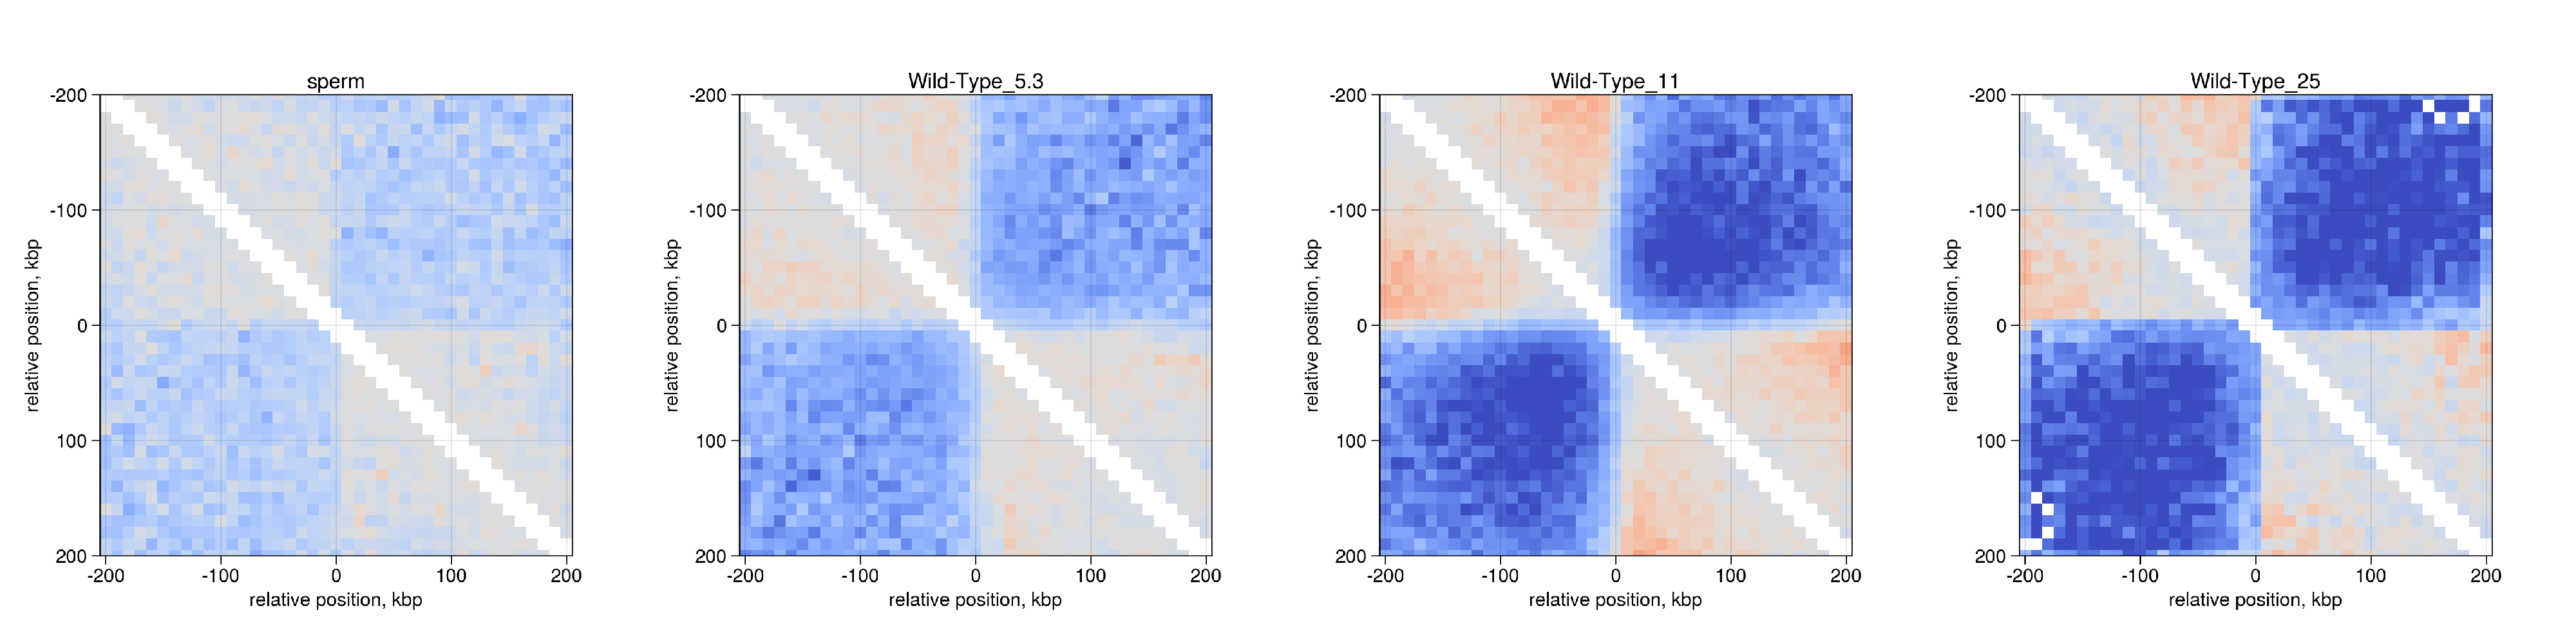

In [25]:
fig, axarr = plt.subplots(1, len(labels), figsize=(5*len(labels),5) )
curr_row = 0
for i, f in enumerate(saddles):

    a = plt.imread(f)

    # find the column by taking the current index modulo 3
    col = i
    # plot on relevant subplot
    axarr[col].imshow(a)
    axarr[col].axis('off')
    
fig.tight_layout()

### Insulation strength at boundaries

In [ ]:
colors = [
    "#8BB8F2", # Blue for sperm 
    "#B0B0B0", # Gray is for pre-ZGA 2.75 hpf
    "#F5C267", # Yellow is for ZGA 5.3 hpf
    "#E98957", # Orange is for post-ZGA 11 hpf
    "#BE5F51", # Red is for late post-ZGA 25 hpf
         ]

In [78]:
labels = [
    'Wild-Type_2.75',
    'sperm',
    'Wild-Type_5.3',
    'Wild-Type_11',
    'Wild-Type_25',
     ]

tmp = pd.DataFrame()

tmp = df_insulation.loc[
        (df_insulation['is_repr_boundary_Wild-Type_2.75']==True)
    ].loc[:, [f'log2IS_Wild-Type_2.75']].melt()

for label in labels[1:]:
    boundaries = df_insulation.loc[
        (df_insulation[f'is_selected_boundary_{label}']==True)
    ].loc[:, [f'log2IS_{label}']].melt()
    
    tmp = pd.concat([tmp, boundaries])
    
tmp = tmp.set_index('variable').loc[[f'log2IS_{label}' for label in labels],:]\
                 .reset_index().rename({'variable':'label'}, axis=1)

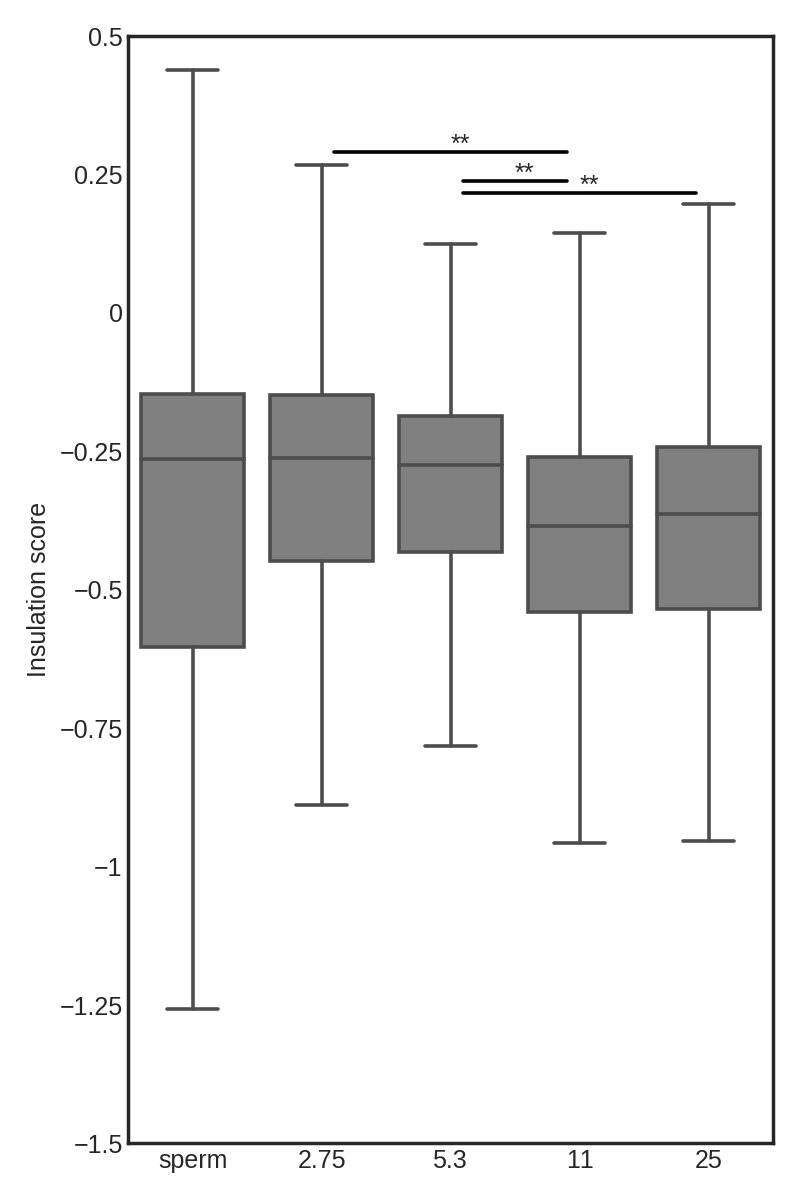

In [79]:
labels = [f'log2IS_{label}' for label in labels]

pvs = plot_boxes(labels, tmp, 
           ylabel='Insulation score',
           y='value', ylim=[-1.5, 0.5],
           max_depth=2, loc=99.9,
           labels_new=['sperm', '2.75', '5.3', '11', '25'])

plt.savefig('images/boxplots/insulation_strength_WT.by-samestage.pdf')

In [80]:
labels = ['WT', 'MZnanog_5.3', 'MZsox19b_5.3', 'MZspg_5.3', 'NP', 'PS', 'SN', 'TR']

tmp = pd.DataFrame()

for label in labels:
    boundaries = df_insulation.loc[
        (df_insulation[f'is_selected_boundary_{label}']==True)
    ].loc[:, [f'log2IS_{label}']].melt()
    
    tmp = pd.concat([tmp, boundaries])
    
tmp = tmp.set_index('variable').loc[[f'log2IS_{label}' for label in labels],:]\
                 .reset_index().rename({'variable':'label'}, axis=1)

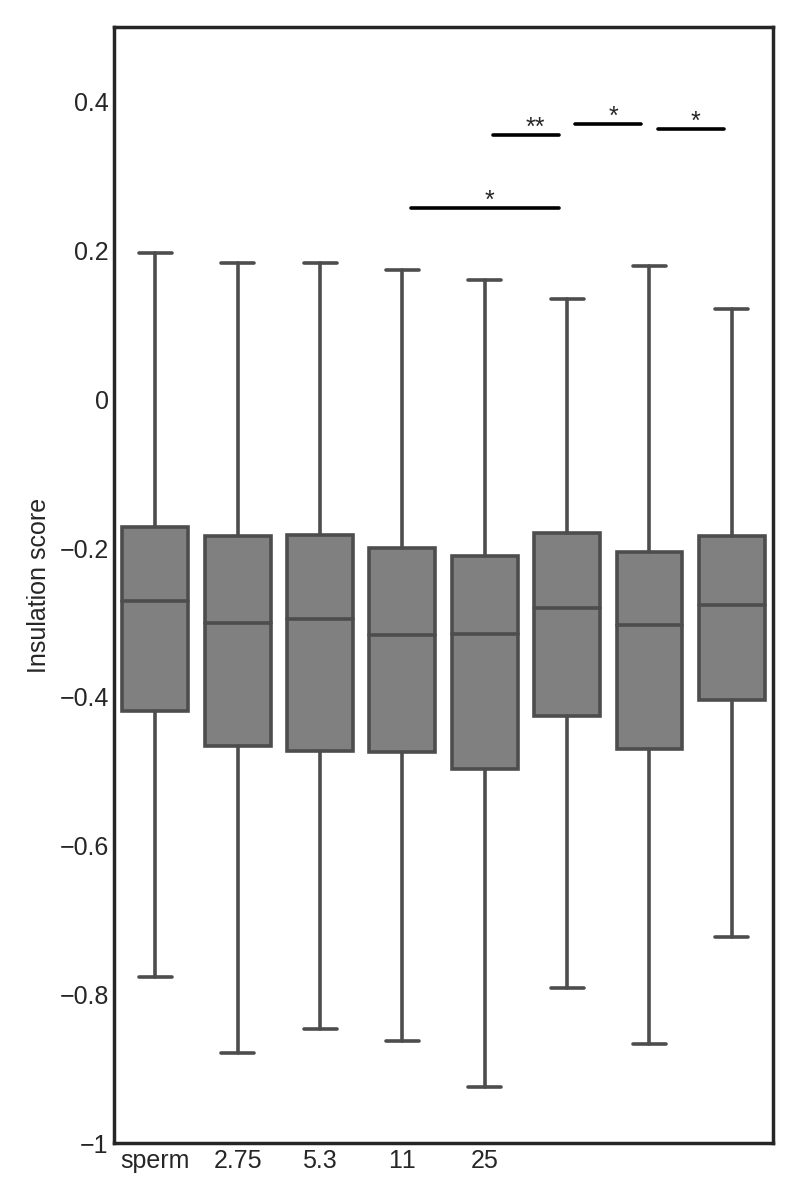

In [81]:
labels = [f'log2IS_{label}' for label in labels]

pvs = plot_boxes(labels, tmp, 
           ylabel='Insulation score',
           y='value', ylim=[-1, 0.5],
           max_depth=2, loc=99.9,
           labels_new=['sperm', '2.75', '5.3', '11', '25'])

plt.savefig('images/boxplots/insulation_strength_MUT.by-samestage.pdf')

In [82]:
labels = [
    'Wild-Type_2.75',
    'sperm',
    'Wild-Type_5.3',
    'Wild-Type_11',
    'Wild-Type_25',
     ]

tmp = pd.DataFrame()

tmp = df_insulation.loc[
        (df_insulation['is_selected_boundary_Wild-Type_11']==True)
    ].loc[:, [f'log2IS_Wild-Type_2.75']].melt()

for label in labels[1:]:
    boundaries = df_insulation.loc[
        (df_insulation[f'is_selected_boundary_Wild-Type_11']==True)
    ].loc[:, [f'log2IS_{label}']].melt()
    
    tmp = pd.concat([tmp, boundaries])
    
tmp = tmp.set_index('variable').loc[[f'log2IS_{label}' for label in labels],:]\
                 .reset_index().rename({'variable':'label'}, axis=1)

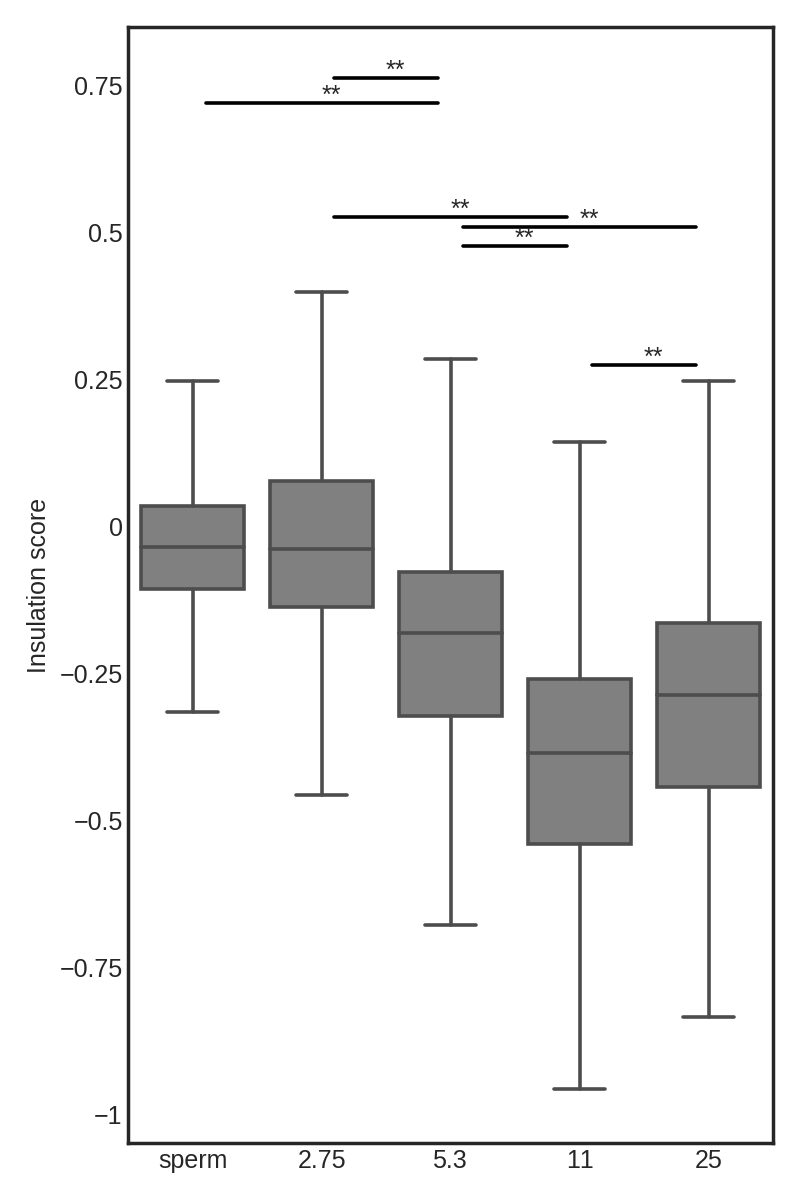

In [83]:
labels = [f'log2IS_{label}' for label in labels]

pvs = plot_boxes(labels, tmp, 
           ylabel='Insulation score',
           y='value', ylim=[-1.05, 0.85],
           max_depth=2, loc=99.9,
           labels_new=['sperm', '2.75', '5.3', '11', '25'])

plt.savefig('images/boxplots/insulation_strength_WT.by-Wild-Type_11.pdf')

In [84]:
labels = ['WT', 'MZnanog_5.3', 'MZsox19b_5.3', 'MZspg_5.3', 'NP', 'PS', 'SN', 'TR']

tmp = pd.DataFrame()

for label in labels:
    boundaries = df_insulation.loc[
        (df_insulation['is_selected_boundary_Wild-Type_11']==True)
    ].loc[:, [f'log2IS_{label}']].melt()
    
    tmp = pd.concat([tmp, boundaries])
    
tmp = tmp.set_index('variable').loc[[f'log2IS_{label}' for label in labels],:]\
                 .reset_index().rename({'variable':'label'}, axis=1)

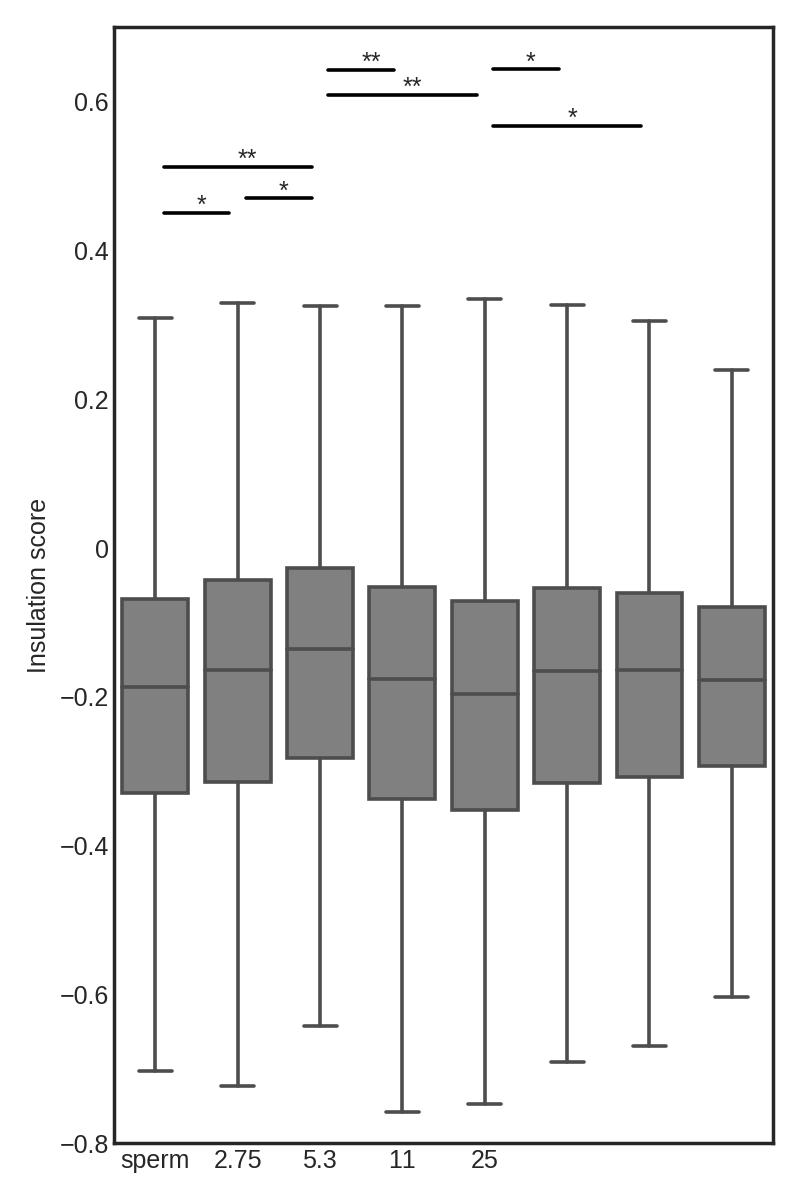

In [85]:
labels = [f'log2IS_{label}' for label in labels]

pvs = plot_boxes(labels, tmp, 
           ylabel='Insulation score',
           y='value', ylim=[-0.8, 0.7],
           max_depth=2, loc=99.9,
           labels_new=['sperm', '2.75', '5.3', '11', '25'])

plt.savefig('images/boxplots/insulation_strength_MUT.by-Wild-Type_11.pdf')

In [86]:
labels = [
    'Wild-Type_2.75',
    'sperm',
    'Wild-Type_5.3',
    'Wild-Type_11',
    'Wild-Type_25',
     ]

tmp = pd.DataFrame()

tmp = df_insulation.loc[
        (df_insulation['is_selected_boundary_Wild-Type_25']==True)
    ].loc[:, [f'log2IS_Wild-Type_2.75']].melt()

for label in labels[1:]:
    boundaries = df_insulation.loc[
        (df_insulation[f'is_selected_boundary_Wild-Type_25']==True)
    ].loc[:, [f'log2IS_{label}']].melt()
    
    tmp = pd.concat([tmp, boundaries])
    
tmp = tmp.set_index('variable').loc[[f'log2IS_{label}' for label in labels],:]\
                 .reset_index().rename({'variable':'label'}, axis=1)

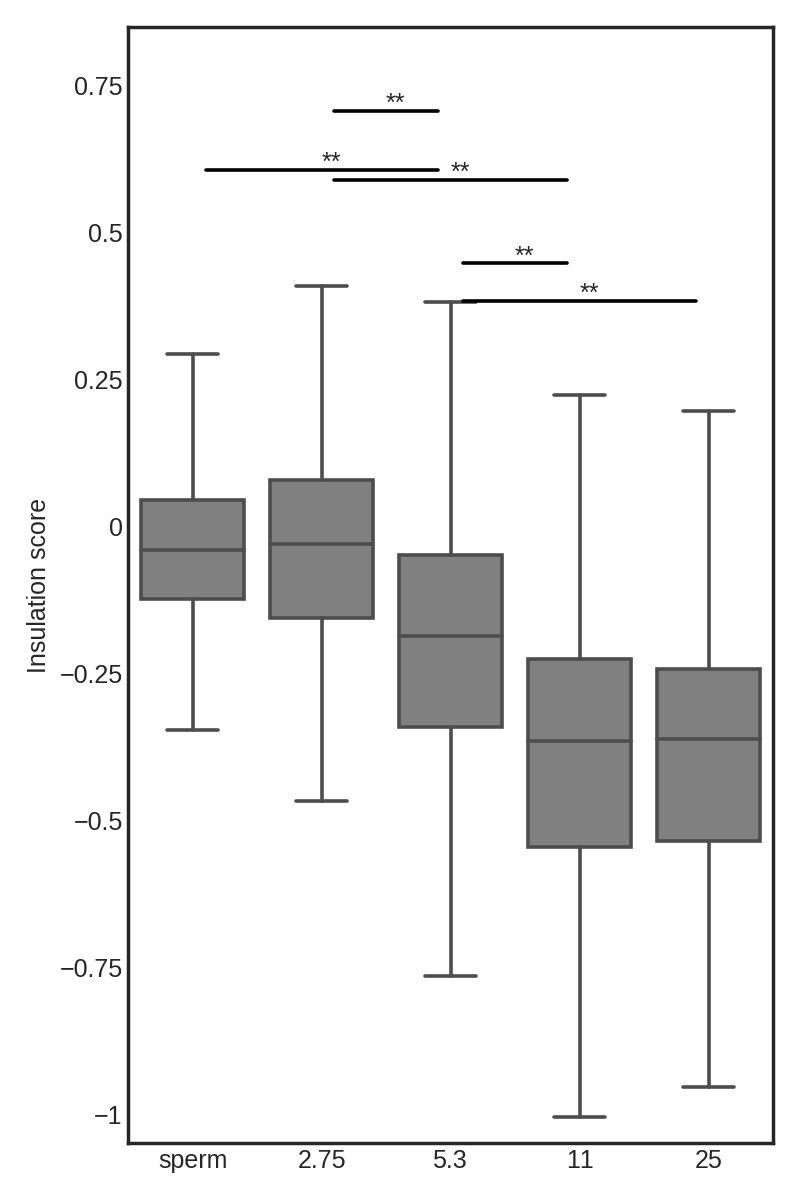

In [87]:
labels = [f'log2IS_{label}' for label in labels]

pvs = plot_boxes(labels, tmp, 
           ylabel='Insulation score',
           y='value', ylim=[-1.05, 0.85],
           max_depth=2, loc=99.92,
           labels_new=['sperm', '2.75', '5.3', '11', '25'])

plt.savefig('images/boxplots/insulation_strength_WT.by-Wild-Type_25.pdf')

In [88]:
labels = ['WT', 'MZnanog_5.3', 'MZsox19b_5.3', 'MZspg_5.3', 'NP', 'PS', 'SN', 'TR']

tmp = pd.DataFrame()

for label in labels:
    boundaries = df_insulation.loc[
        (df_insulation['is_selected_boundary_Wild-Type_25']==True)
    ].loc[:, [f'log2IS_{label}']].melt()
    
    tmp = pd.concat([tmp, boundaries])
    
tmp = tmp.set_index('variable').loc[[f'log2IS_{label}' for label in labels],:]\
                 .reset_index().rename({'variable':'label'}, axis=1)

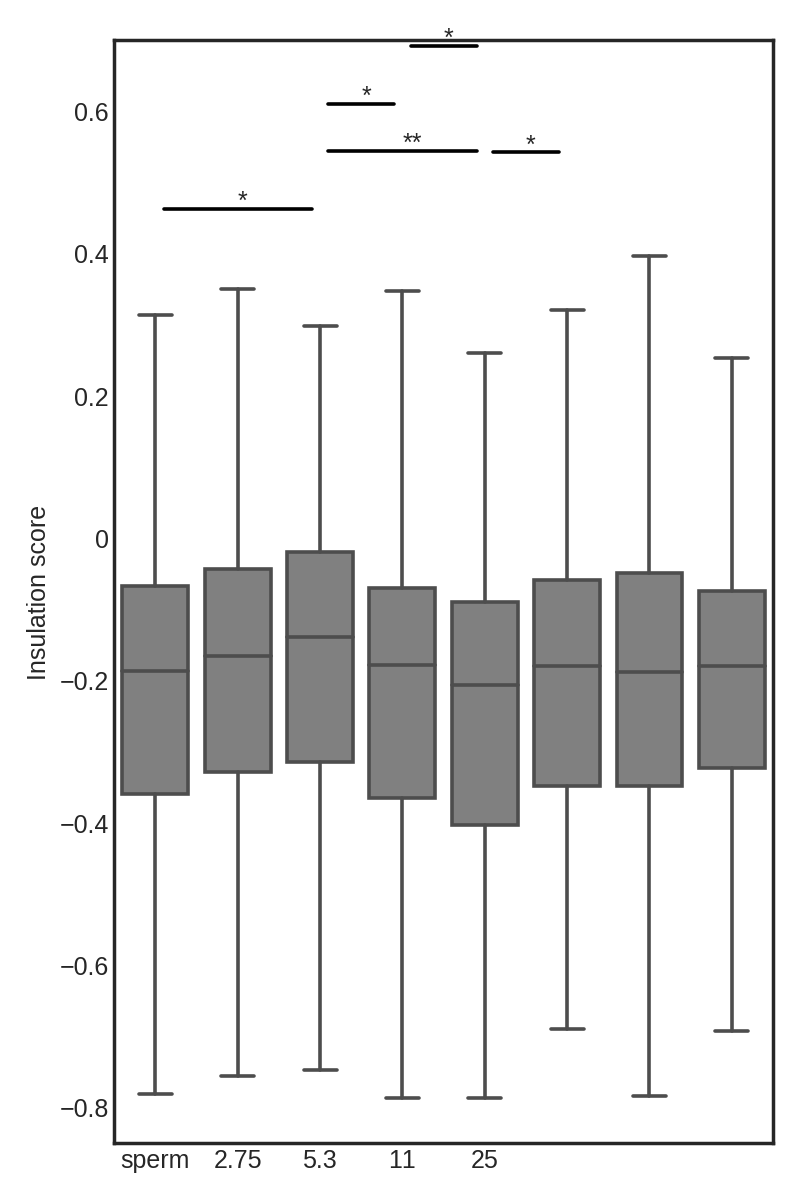

In [89]:
labels = [f'log2IS_{label}' for label in labels]

pvs = plot_boxes(labels, tmp, 
           ylabel='Insulation score',
           y='value', ylim=[-0.85, 0.7],
           max_depth=2, loc=99.9,
           labels_new=['sperm', '2.75', '5.3', '11', '25'])

plt.savefig('images/boxplots/insulation_strength_MUT.by-Wild-Type_25.pdf')